# ```Hotel Reservation Cancellation Prediction```

Anda adalah Data Scientist di sebuah perusahaan hotel. Anda diberikan dataset berisi informasi pemesanan kamar hotel (booking information) baik untuk hotel kota (city hotel) maupun hotel resort. Dataset ini juga mengandung kapan booking dilakukan, lama menginap, jumlah pengunjung dewasa, anak-anak, dan/atau bayi, serta ketersediaan tempat parkir. Informasi lain mengenai dataset bisa Anda baca di keterangan dataset di bawah ini:

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# A. Data Cleaning & Preprocessing

Dari data dibawah dapat dilihat bahwa data asli dari 'hotel_bookings' berjumlah **119390 rows** dan **32 columns**

In [114]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Lalu langkah di bawah ini dilakukan untuk selecting data berjumlah **5000 rows** sesuai ketentuan jumlah data yang akan dianalisa

In [115]:
df = df[:5000]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4996,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4997,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16
4998,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16


Lalu di lakukan feature selection yang telah di tentukan berjumlah **16 kolom** sesuai dengan yang akan dianalisa

In [116]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


Mengeluarkan informasi terhadap data yang sudah di bersihkan, dimana:

- Terdapat **16 Kolom**
- dengan 1 type data berupa **Float**, 7 type data berupa **integer**, dan 8 type data berupa **object**
- dapat terlihat juga dari 5000 data pada kolom **country** terdapat data non-null

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

Mengecek data **null**, tedapat 2 data null pada kolom **country**

In [118]:
df.isna().sum()[df.isna().sum()>0]

country    2
dtype: int64

Berdasarkan pengamatan data null di bawah, maka:

- Dapat disimpulkan data null merupakan data kosong dari negara, yang mana sulit menghubungkan asal negara dengan variabel lainya yang ada di dalam data, sehingga sulit untuk memprediksi mengisi data null tersebut berdasarkan central tendency atau keterkaitan dengan variabel lainya.
- Data null berjumlah 2 data dari 5000 total data yang akan dipakai (0,04 %) sehingga masih aman untuk dilakukan **drop** null

In [119]:
df[df['country'].isna()]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,1,0.0,0,BB,NaN,Direct,Direct,A,2,No Deposit,0,Transient,0,2
4127,Resort Hotel,1,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


Melakukan **Drop Null Value**

In [120]:
df.dropna(inplace = True)

Pengecekan data null sudah tidak ada di dalam data, dan data siap untuk diproses

In [121]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

# B. EDA

Melalkukan pengecekan data melalui metode describe di mana dapat dilihat, data yang di tampilkan adalah numerical:
- Count = Jumlah data
- Mean = Nilai rata - rata
- Std = Standart deviasi
- Min = jumlah value minimum
- 25%, 50%, 75% = inter quartile dari data tersebut
- max = jumlah value maximum
- dapat dilihat dari data tersebut kebanyakan data bersifat sama dengan value std yang dengan skala yang sama, terkecuali pada kolom **days_in_waiting_list** sebesar **13.548022**

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,4998.0,0.459584,0.498414,0.0,0.0,0.0,1.0,1.0
adults,4998.0,1.970388,1.566332,0.0,2.0,2.0,2.0,55.0
children,4998.0,0.115646,0.444916,0.0,0.0,0.0,0.0,10.0
babies,4998.0,0.014806,0.122433,0.0,0.0,0.0,0.0,2.0
booking_changes,4998.0,0.206883,0.612080,0.0,0.0,0.0,0.0,17.0
days_in_waiting_list,4998.0,1.772709,13.548022,0.0,0.0,0.0,0.0,122.0
required_car_parking_spaces,4998.0,0.093838,0.293001,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,4998.0,0.601841,0.823128,0.0,0.0,0.0,1.0,4.0


Melalkukan pengecekan data melalui metode describe **Object** di mana dapat dilihat, data yang di tampilkan adalah hanya data object:
- Count = Jumlah data
- Unique = Unique value pada tiap data
- Top = Jumlah data yang paling banyak keluar
- Freq = Banyaknya frekuensi dari data top
- dapat dilihat jika hotel memiliki data unique hanya **1**, yang mana dapat di drop atau tidak di gunakan dalam analisa data.
- dan pada kolom country memiliki unique value terbanyak yaitu  *56* data, dengan top = **PRT**, dan freq = **3174**

In [123]:
df.describe(include='object').T

,count,unique,top,freq
hotel,4998,1,Resort Hotel,4998
meal,4998,5,BB,3417
country,4998,56,PRT,3174
market_segment,4998,6,Online TA,2156
distribution_channel,4998,3,TA/TO,3656
reserved_room_type,4998,8,A,3166
deposit_type,4998,3,No Deposit,4459
customer_type,4998,4,Transient,3697


## Visualisasi EDA

### Target Data/Dependence Data

In [124]:
cancel = df['is_canceled'].value_counts()[1]
not_cancel = df['is_canceled'].value_counts()[0]

print('Total Cancel:', cancel, '\n' 'Total not Cancel:', not_cancel)

Total Cancel: 2297 
Total not Cancel: 2701


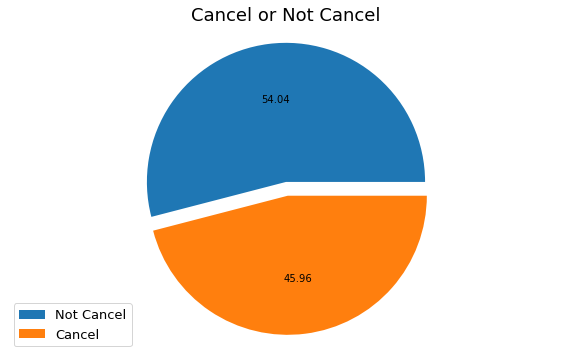

In [125]:
explode = (0, 0.1)

plt.figure(figsize=(10, 6))
plt.title('Cancel or Not Cancel', fontsize=18)
labels = 'Not Cancel', 'Cancel'
plt.pie(df['is_canceled'].value_counts(), #ini proporsi datanya
        autopct = '%.2f', #menampilkan data di pie chart
        explode = explode #supaya terpisah
       )
plt.legend(labels, loc='lower left', fontsize = 13)
plt.axis('equal')
plt.show()

Dari visualisasi diatas dapat dilihat proporsi perbandingan data Target yaitu **Cancel (45.96%)** dan **Not Cancel (54.04%)**, yang artinya adata target cukup balance dan tidak perlu dilakukan **under sampling atau over sampling**

### Independence Data

Dikarenakan dari data independence terdapat 2 type data yaitu **object** dan **numerical**, maka visualisasi akan di bedakan berdasarkan dari dua type data tersebut

#### Object / Category data

Langkah di bawah ini untuk memisahkan 

In [126]:
df_category = df.loc[:, df.dtypes == np.object]
df_category.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,BB,PRT,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,BB,PRT,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,BB,GBR,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,No Deposit,Transient


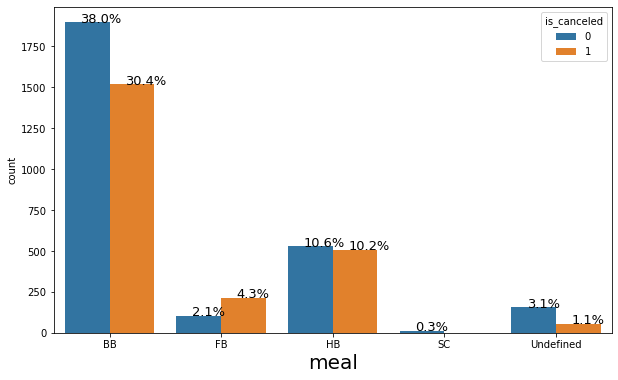

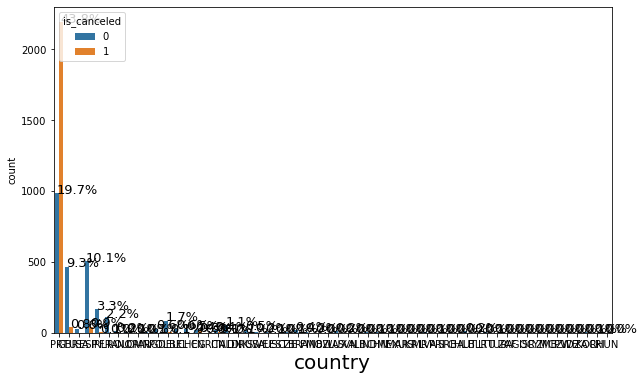

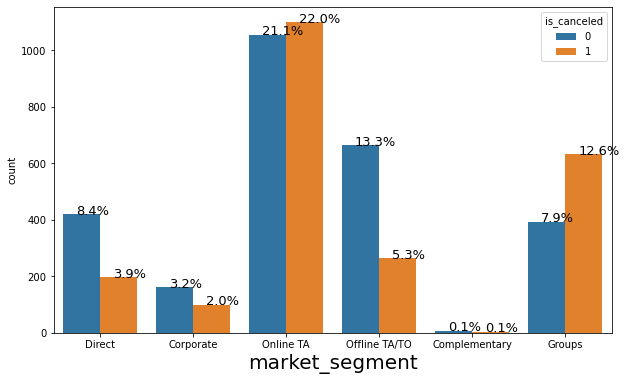

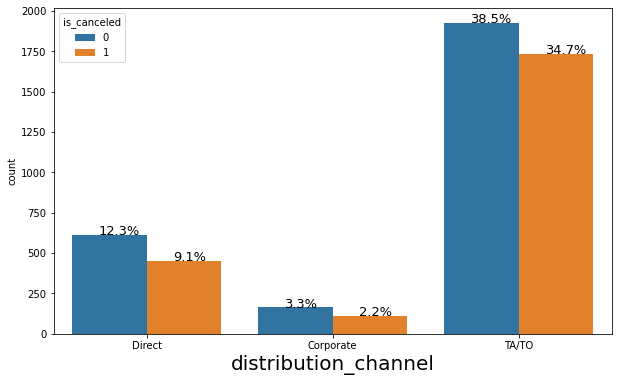

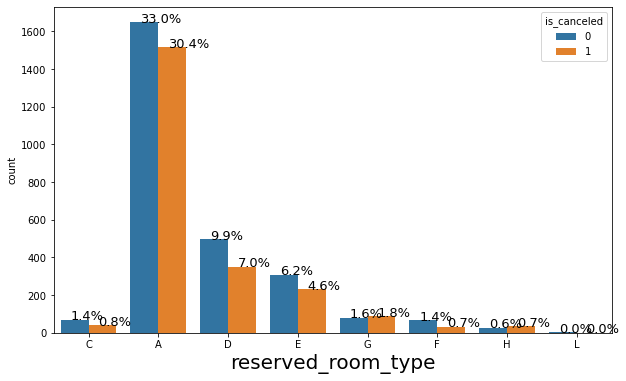

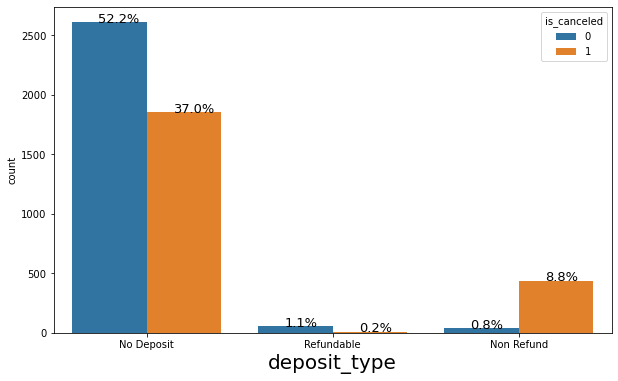

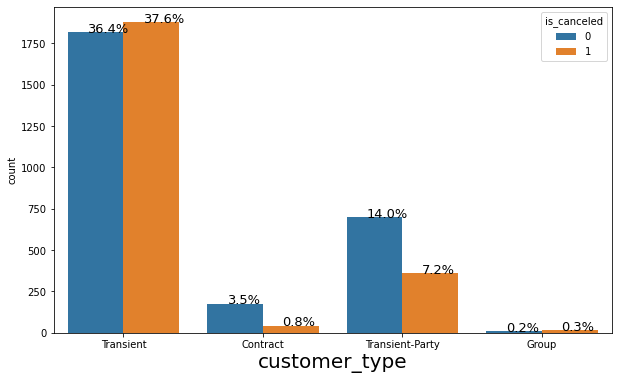

In [127]:
for columns in df_category.drop(columns=['hotel']):
    plt.figure(figsize = (10,6))
    ax = sns.countplot(x = columns, data = df, hue = 'is_canceled')
     
    total = len(df[columns])
    for fit in ax.patches:
        pct = '{:.1f}%'.format(100 * fit.get_height()/total)
        xpos = fit.get_x() + 0.14
        ypos = fit.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(columns, fontsize = 20)    
    plt.show()

Dari Visusalisasi data diatas dapat disimpulkan bahwa:
- Pemesanan tertinggi di Meal adalah dengan BB (Bed with breakfast)
- Negara dengan jumlah pemesan terbanyak adalah 'PRT' namun dengan perbandingan yang banyak juga untu cancel dibanding not cancel
- Untuk market segmen online TA memegang pemesan tertinggi 
- distribution chanel pemesanan tertinggi dipegang oleh TA/TO
- Kamar yang di pesan tertinggi adalah type A
- Deposit type tertinggi dengan non-deposit
- dan customer_type tertinggi dengan transient
- Berdasarkan hasil ini maka jumlah cancel di negara PRT harus di analisa lebih lanjut mengenai penyebab cancel nya

#### Numerical Data

Langkah di bawah ini untuk memisahkan 

In [29]:
df_numerical = df.loc[:, df.dtypes != np.object]
df_numerical

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,3,0,0,0
1,0,2,0.0,0,4,0,0,0
2,0,1,0.0,0,0,0,0,0
3,0,1,0.0,0,0,0,0,0
4,0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4995,1,2,0.0,0,0,0,0,0
4996,1,2,0.0,0,0,0,0,0
4997,1,2,0.0,0,0,0,0,0
4998,1,2,0.0,0,0,0,0,0


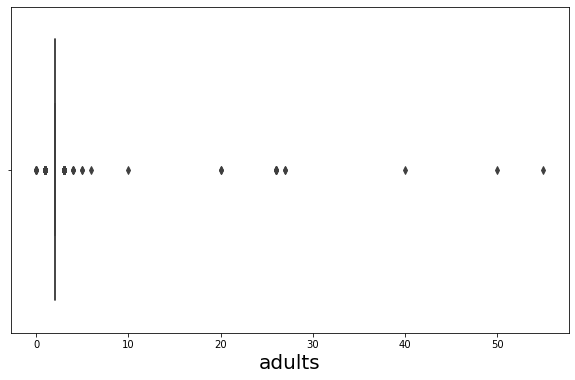

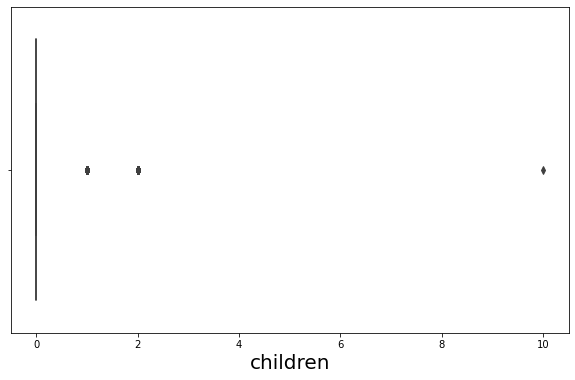

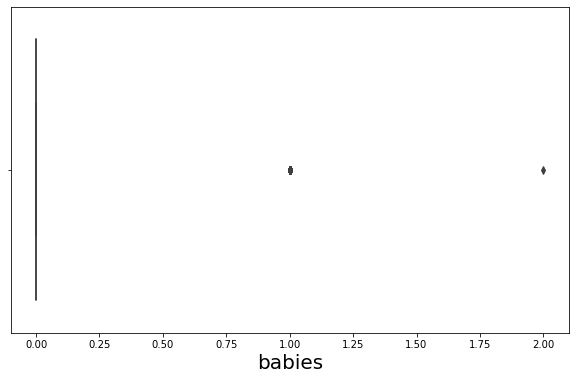

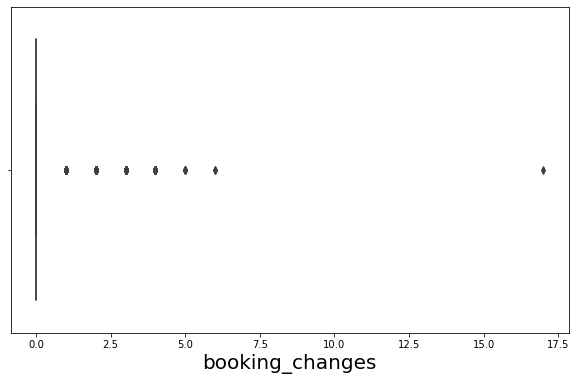

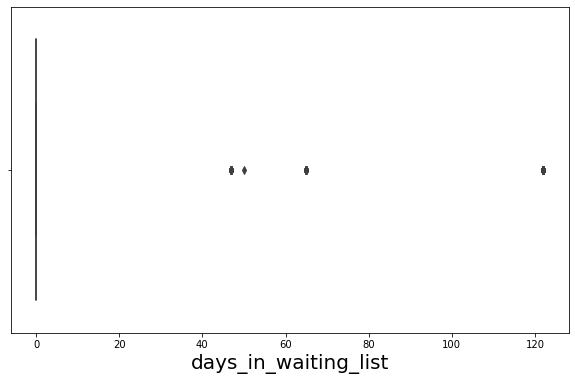

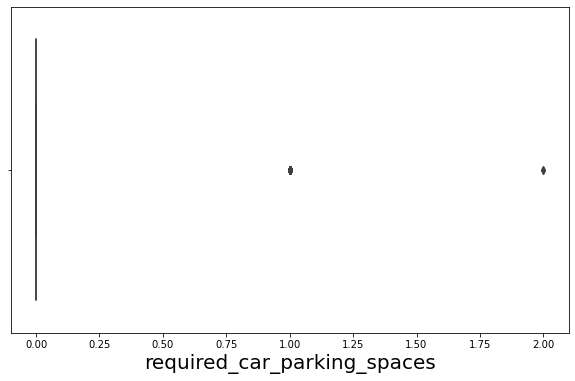

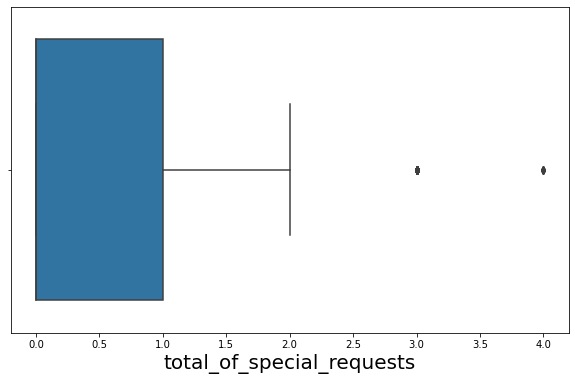

In [35]:
for columns in df_numerical.drop(columns=['is_canceled']):
    plt.figure(figsize = (10,6))
    ax = sns.boxplot(x = columns, data = df)
    
    plt.xlabel(columns, fontsize = 20)    
    plt.show()

Dari data diatas dilakukan visulaisasi untuk melihat outlier yang ada pada data numerical, fungsinga adalah untuk mengetahui method scalling yang akan di lakukan pada saat mechine learning, karena semua data numerikal memiliki outlier maka akan dilakukan scaller menggunakan Robust Scallar

# C. Model Building & Hyper-parameter Tuning

## labeling untuk data categorical

In [40]:
df_encode = df.copy()

In [42]:
labelencoder=LabelEncoder()

df_encode['meal']=labelencoder.fit_transform(df_encode['meal'])
df_encode['country']=labelencoder.fit_transform(df_encode['country'])
df_encode['market_segment']=labelencoder.fit_transform(df_encode['market_segment'])
df_encode['distribution_channel']=labelencoder.fit_transform(df_encode['distribution_channel'])
df_encode['reserved_room_type']=labelencoder.fit_transform(df_encode['reserved_room_type'])
df_encode['deposit_type']=labelencoder.fit_transform(df_encode['deposit_type'])
df_encode['customer_type']=labelencoder.fit_transform(df_encode['customer_type'])

In [43]:
df_encode.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,0,43,2,1,1,3,0,0,2,0,0
1,Resort Hotel,0,2,0.0,0,0,43,2,1,1,4,0,0,2,0,0
2,Resort Hotel,0,1,0.0,0,0,24,2,1,0,0,0,0,2,0,0
3,Resort Hotel,0,1,0.0,0,0,24,1,0,0,0,0,0,2,0,0
4,Resort Hotel,0,2,0.0,0,0,24,5,2,0,0,0,0,2,0,1


## Membuat Parameter untuk Hypertuning

Karena data target merupakan Categorical maka ML yang akan digunakan adalah ML untuk CLustering yaitu **Logistic Regression**, **Random Forest Classifier**, dan **DEcision Tree Classifier**

In [70]:
#LogRegression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
LRG_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter}

In [71]:
#Random Forest
max_depth = [10, 20, 40, 'None']
min_samples_leaf = [2, 4]
min_samples_split = [2, 10]
n_estimators = [10, 100]

RFC_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [72]:
#Decision Tree
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth=[20,40,60,80,100]
min_samples_split= [2, 6, 10]
min_samples_leaf= [1, 2, 4]

DTC_param = {'criterion' : criterion, 'splitter' : splitter, 'max_depth' : max_depth,
             'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

## Spliting Dataset

In [73]:
x = df_encode.drop(['is_canceled', 'hotel'], axis= 1)
y = df_encode['is_canceled']

In [74]:
#Split train data 80%, test data 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Scalling menggunakan Robustscalling

In [75]:
x_train = RobustScaler().fit_transform(x_train)
x_test = RobustScaler().fit_transform(x_test)

## Model Fitting tanpa Tunning

In [76]:
#Model
LRG = LogisticRegression().fit(x_train, y_train)
RFC = RandomForestClassifier().fit(x_train, y_train)
DTC = DecisionTreeClassifier().fit(x_train, y_train)

## Hyper Parameter Tunning

### Menentukan Parameter yang akan di RandomSearch

In [70]:
#LogRegression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
LRG_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter}

In [71]:
#Random Forest
max_depth = [10, 20, 40, 'None']
min_samples_leaf = [2, 4]
min_samples_split = [2, 10]
n_estimators = [10, 100]

RFC_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [72]:
#Decision Tree
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth=[20,40,60,80,100]
min_samples_split= [2, 6, 10]
min_samples_leaf= [1, 2, 4]

DTC_param = {'criterion' : criterion, 'splitter' : splitter, 'max_depth' : max_depth,
             'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

### Mencari parameter terbaik menggunakan RandomSearch berdasarkan parameter diatas

In [77]:
# Hyperparameter tunning
RSCV_LRG = RandomizedSearchCV(estimator = LRG, param_distributions = LRG_param, cv=5).fit(x_train, y_train)
RSCV_RFC = RandomizedSearchCV(estimator = RFC, param_distributions = RFC_param, cv=5).fit(x_train, y_train)
RSCV_DTC = RandomizedSearchCV(estimator = DTC, param_distributions = DTC_param, cv=5).fit(x_train, y_train)

In [78]:
print('best parameter LRG : ' ,RSCV_LRG.best_params_)
print('best parameter RFC : ' ,RSCV_RFC.best_params_)
print('best parameter DTC : ' ,RSCV_DTC.best_params_)

best parameter LRG :  {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1000}
best parameter RFC :  {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40}
best parameter DTC :  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 60, 'criterion': 'entropy'}


### Melakukan Model Fitting dengan tuning parameter sesuai hasil RandomSearch

In [79]:
LRG_BP = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 1000).fit(x_train, y_train)
RFC_BP = RandomForestClassifier(n_estimators = 10, min_samples_split = 10, min_samples_leaf = 2, max_depth = 40).fit(x_train, y_train)
DTC_BP = DecisionTreeClassifier(splitter = 'best', min_samples_split = 2, min_samples_leaf = 1, max_depth = 60, criterion = 'entropy').fit(x_train, y_train)### Mencari parameter terbaik menggunakan RandomSearch berdasarkan parameter diatas

# D. Model Evaluation

## Predict Model

### Predict model tanpa tunning

In [80]:
# Logistic Regression
y_pred_LRG = LRG.predict(x_test)

# Random Forest
y_pred_RFC = RFC.predict(x_test)

# Decision Tree
y_pred_DTC = DTC.predict(x_test)

### Predict model dengan tunning

In [81]:
# Logistic Regression
y_pred_LRG_BP = LRG_BP.predict(x_test)

# Random Forest
y_pred_RFC_BP = RFC_BP.predict(x_test)

# Decision Tree
y_pred_DTC_BP = DTC_BP.predict(x_test)

## Evaluasi Score Model

Dalam data yang di analisa ini diartikan bahwa nilai 0 berarti tidak melakukan cancel dan nilai 1 melakukan cancelation. Yang berarti 0 itu negatif, 1 itu positif.

### Evaluasi tanpa Tunning

In [93]:
class_report_LRG = pd.DataFrame(classification_report(y_test, y_pred_LRG, output_dict= True)).T
class_report_RFC = pd.DataFrame(classification_report(y_test, y_pred_RFC, output_dict= True)).T
class_report_DTC = pd.DataFrame(classification_report(y_test, y_pred_DTC, output_dict= True)).T

In [94]:
pd.concat([class_report_LRG, class_report_RFC, class_report_DTC], keys = ['Logistic Regression', 'Random Forest', 'Decision Tree'])

precision    recall  f1-score   support
Logistic Regression 0              0.892009  0.752277  0.816206   549.000
                    1              0.746741  0.889135  0.811741   451.000
                    accuracy       0.814000  0.814000  0.814000     0.814
                    macro avg      0.819375  0.820706  0.813973  1000.000
                    weighted avg   0.826493  0.814000  0.814192  1000.000
Random Forest       0              0.904297  0.843352  0.872762   549.000
                    1              0.823770  0.891353  0.856230   451.000
                    accuracy       0.865000  0.865000  0.865000     0.865
                    macro avg      0.864034  0.867352  0.864496  1000.000
                    weighted avg   0.867979  0.865000  0.865306  1000.000
Decision Tree       0              0.901575  0.834244  0.866604   549.000
                    1              0.815041  0.889135  0.850477   451.000
                    accuracy       0.859000  0.859000  0.859000     0.859
                    macro avg      0.858308  0.861690  0.858540  1000.000
                    weighted avg   0.862548  0.859000  0.859331  1000.000

Dari data diatas hal yang perlu diperhatikan adalah:
- Recall dalam data 1/ recall positive yang mana recall positive merupakan hasil dari presentasi antara tp/tp+fn dimana semakin tinggi score nya maka dari actual yang cancel booking juga akan terdeteksi cancel bukan dilihat sebagai not cancel.
- karena jika ankga fn tinggi atau tp rendah yang berarti recall positive kecil maka perusahaan akan banyak mempersiapkan preparasi untu menyambut tamu seperti, penambahan jumlah makanan, penjemputan di bandara, kamar yang tidak di okupansi dan lainya
- dari data diatas recall positive atau 1 yang terbesar adalah dengan ML Random **Forest** dengan nilai **0.891353**

### Evaluasi dengan Tunning

In [95]:
class_report_LRG_BP = pd.DataFrame(classification_report(y_test, y_pred_LRG_BP, output_dict= True)).T
class_report_RFC_BP = pd.DataFrame(classification_report(y_test, y_pred_RFC_BP, output_dict= True)).T
class_report_DTC_BP = pd.DataFrame(classification_report(y_test, y_pred_DTC_BP, output_dict= True)).T

In [96]:
pd.concat([class_report_LRG_BP, class_report_RFC_BP, class_report_DTC_BP], keys = ['Logistic Regression (Best Param)', 'Random Forest (Best Param)', 'Decision Tree (Best Param)'])

precision    recall  f1-score  \
Logistic Regression (Best Param) 0              0.893709  0.750455  0.815842   
                                 1              0.745826  0.891353  0.812121   
                                 accuracy       0.814000  0.814000  0.814000   
                                 macro avg      0.819767  0.820904  0.813981   
                                 weighted avg   0.827014  0.814000  0.814164   
Random Forest (Best Param)       0              0.910331  0.850638  0.879473   
                                 1              0.831622  0.898004  0.863539   
                                 accuracy       0.872000  0.872000  0.872000   
                                 macro avg      0.870977  0.874321  0.871506   
                                 weighted avg   0.874834  0.872000  0.872287   
Decision Tree (Best Param)       0              0.896282  0.834244  0.864151   
                                 1              0.813906  0.882483  0.846809   
                                 accuracy       0.856000  0.856000  0.856000   
                                 macro avg      0.855094  0.858364  0.855480   
                                 weighted avg   0.859130  0.856000  0.856330   

                                                support  
Logistic Regression (Best Param) 0              549.000  
                                 1              451.000  
                                 accuracy         0.814  
                                 macro avg     1000.000  
                                 weighted avg  1000.000  
Random Forest (Best Param)       0              549.000  
                                 1              451.000  
                                 accuracy         0.872  
                                 macro avg     1000.000  
                                 weighted avg  1000.000  
Decision Tree (Best Param)       0              549.000  
                                 1              451.000  
                                 accuracy         0.856  
                                 macro avg     1000.000  
                                 weighted avg  1000.000

Dari data diatas hal yang perlu diperhatikan adalah:
- Recall dalam data 1/ recall positive yang mana recall positive merupakan hasil dari presentasi antara tp/tp+fn dimana semakin tinggi score nya maka dari actual yang cancel booking juga akan terdeteksi cancel bukan dilihat sebagai not cancel.
- karena jika ankga fn tinggi atau tp rendah yang berarti recall positive kecil maka perusahaan akan banyak mempersiapkan preparasi untu menyambut tamu seperti, penambahan jumlah makanan, penjemputan di bandara, kamar yang tidak di okupansi dan lainya
- dari data diatas recall positive atau 1 yang terbesar adalah dengan ML Random **Forest** dengan nilai **0.8980043**

### Visualisasi evaluasi tanpa Tunning

In [98]:
# lRG
conf_mat_LRG = confusion_matrix(y_test, y_pred_LRG)

# RFC
conf_mat_RFC = confusion_matrix(y_test, y_pred_RFC)

# DTC
### Evaluasi tanpa dengan Tunning = confusion_matrix(y_test, y_pred_DTC)

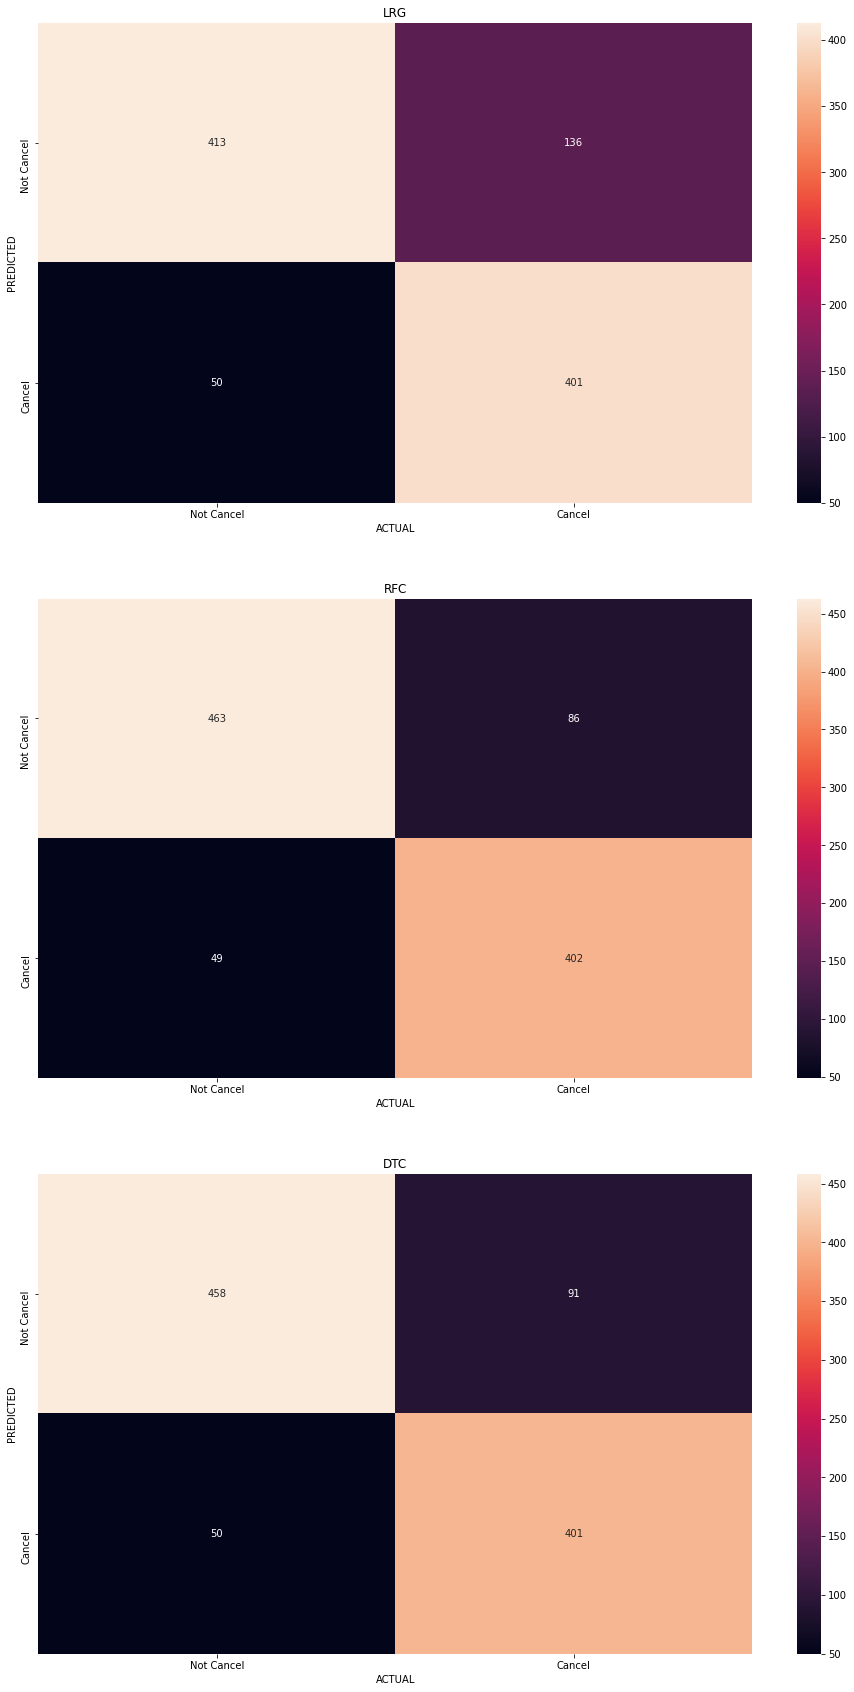

In [107]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(16,30))
sns.heatmap(conf_mat_LRG, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(conf_mat_RFC, annot=True, fmt=".0f", ax=ax2)
sns.heatmap(conf_mat_DTC, annot=True, fmt=".0f", ax=ax3)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)
ax3.xaxis.set_ticklabels(labels), ax3.yaxis.set_ticklabels(labels)

ax1.set_title('LRG'), ax2.set_title('RFC'), ax3.set_title('DTC')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL'), ax3.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax3.set_ylabel('PREDICTED'), ax3.set_ylabel('PREDICTED')

plt.show()

Sama seperti hasil scoring sebelumnya dari hasil visualisasi diatas maka dapat di simpulkan recall nya adalah paling tinggi adalah ML **Random Forerst**, dengan nilai:

- TP = 402
- FN = 86

### Visualisasi evaluasi dengan Tunning

In [99]:
# lRG
conf_mat_LRG_BP = confusion_matrix(y_test, y_pred_LRG_BP)

# RFC
conf_mat_RFC_BP = confusion_matrix(y_test, y_pred_RFC_BP)

# DTC
conf_mat_DTC_BP = confusion_matrix(y_test, y_pred_DTC_BP)

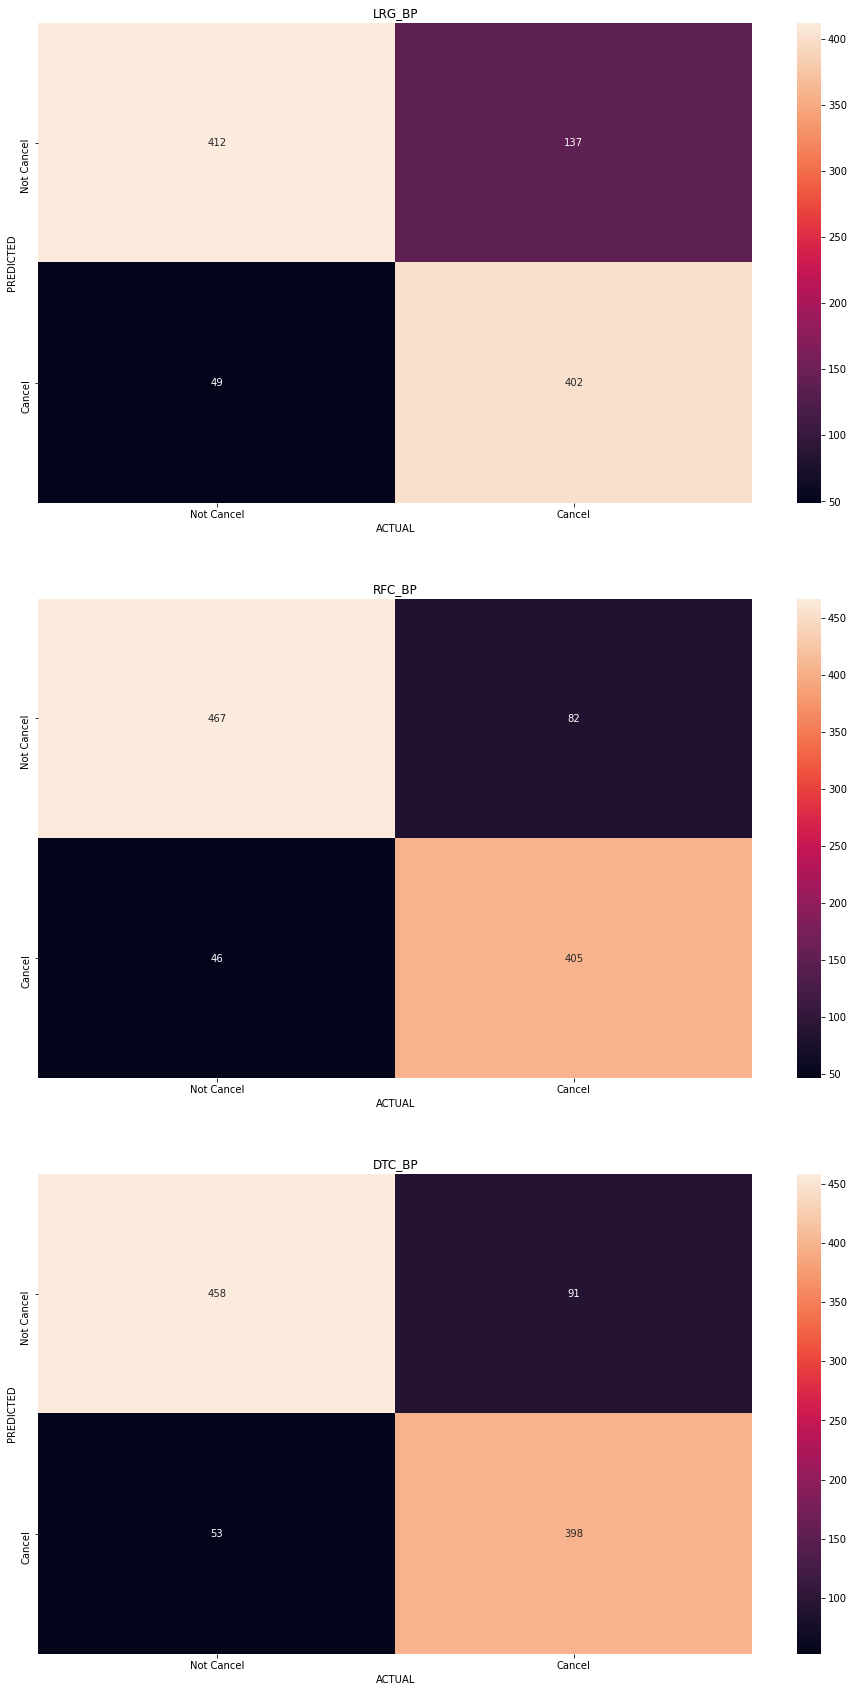

In [108]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(16,30))
sns.heatmap(conf_mat_LRG_BP, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(conf_mat_RFC_BP, annot=True, fmt=".0f", ax=ax2)
sns.heatmap(conf_mat_DTC_BP, annot=True, fmt=".0f", ax=ax3)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)
ax3.xaxis.set_ticklabels(labels), ax3.yaxis.set_ticklabels(labels)

ax1.set_title('LRG_BP'), ax2.set_title('RFC_BP'), ax3.set_title('DTC_BP')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL'), ax3.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax3.set_ylabel('PREDICTED'), ax3.set_ylabel('PREDICTED')

plt.show()

Untuk Hasil Hyper Parameter Tuning, seperti hasil scoring sebelumnya dari hasil visualisasi diatas maka dapat di simpulkan recall nya adalah paling tinggi adalah ML **Random Forerst**, dengan nilai:

- TP = 405
- FN = 82

# Kesimpulan

Dari hasil analisa EDA, ML tanpa hypertuning, dan ML dengan hypertuning dapat disimpulkan bahwa:

- Recall positive data 1 / cancel adalah scoring paling berpengaruh untuk menghindari perusahaan dari kerugian
- karena jika ankga fn tinggi atau tp rendah yang berarti recall positive kecil maka perusahaan akan banyak mempersiapkan preparasi untu menyambut tamu seperti, penambahan jumlah makanan, penjemputan di bandara, kamar yang tidak di okupansi dan lainya.
- ML paling efektif yang paling efektif adalah ML Random Forest dengan Hyper parameter tuning dengan nilai recall positive **0.8980043**, TP = **405**, dan FN=**82**